In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [7]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_8_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:200000, :]
x_test = input_data[200000:205000, :]


(205000, 24)


In [10]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_8_2.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:200000, :]
y_test = output_data[200000:205000, :]
print(output_data.shape)

(205000, 12)
(205000, 12)


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 200000 samples, validate on 5000 samples
Epoch 1/150
200000/200000 - 3s - loss: 0.2681 - accuracy: 0.8916 - val_loss: 0.2080 - val_accuracy: 0.9147
Epoch 2/150
200000/200000 - 2s - loss: 0.1977 - accuracy: 0.9158 - val_loss: 0.1920 - val_accuracy: 0.9159
Epoch 3/150
200000/200000 - 2s - loss: 0.1677 - accuracy: 0.9219 - val_loss: 0.1480 - val_accuracy: 0.9270
Epoch 4/150
200000/200000 - 2s - loss: 0.1263 - accuracy: 0.9386 - val_loss: 0.1159 - val_accuracy: 0.9459
Epoch 5/150
200000/200000 - 2s - loss: 0.0987 - accuracy: 0.9539 - val_loss: 0.0913 - val_accuracy: 0.9587
Epoch 6/150
200000/200000 - 2s - loss: 0.0797 - accuracy: 0.9634 - val_loss: 0.0785 - val_accuracy: 0.9641
Epoch 7/150
200000/200000 - 2s - loss: 0.0665 - accuracy: 0.9693 - val_loss: 0.0640 - val_accuracy: 0.9711
Epoch 8/150
200000/200000 - 2s - loss: 0.0566 - accuracy: 0.9734 - val_loss: 0.0588 - val_accuracy: 0.9726
Epoch 9/150
200000/200000 - 2s - loss: 0.0483 - accuracy: 0.9768 - val_loss: 0.0495 - val_accu

Epoch 77/150
200000/200000 - 2s - loss: 0.0265 - accuracy: 0.9841 - val_loss: 0.0299 - val_accuracy: 0.9837
Epoch 78/150
200000/200000 - 2s - loss: 0.0253 - accuracy: 0.9844 - val_loss: 0.0300 - val_accuracy: 0.9836
Epoch 79/150
200000/200000 - 2s - loss: 0.0278 - accuracy: 0.9837 - val_loss: 0.0315 - val_accuracy: 0.9830
Epoch 80/150
200000/200000 - 2s - loss: 0.0264 - accuracy: 0.9842 - val_loss: 0.0295 - val_accuracy: 0.9836
Epoch 81/150
200000/200000 - 2s - loss: 0.0257 - accuracy: 0.9843 - val_loss: 0.0278 - val_accuracy: 0.9832
Epoch 82/150
200000/200000 - 2s - loss: 0.0254 - accuracy: 0.9844 - val_loss: 0.0286 - val_accuracy: 0.9830
Epoch 83/150
200000/200000 - 2s - loss: 0.0273 - accuracy: 0.9839 - val_loss: 0.0296 - val_accuracy: 0.9833
Epoch 84/150
200000/200000 - 2s - loss: 0.0270 - accuracy: 0.9840 - val_loss: 0.0302 - val_accuracy: 0.9826
Epoch 85/150
200000/200000 - 2s - loss: 0.0263 - accuracy: 0.9841 - val_loss: 0.0292 - val_accuracy: 0.9832
Epoch 86/150
200000/200000 -

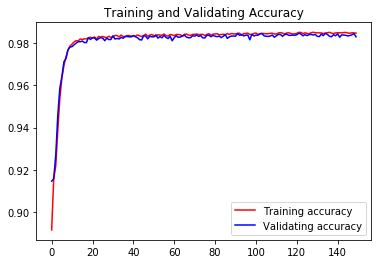

In [13]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [14]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_8_2_model.h5')